# Task 1: Importing the analysis and visualization libraries, and the most up-to-date project data

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Define the path to the prepared data folder

In [3]:
# Define the path to the prepared data folder

prepared_data_path = r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\02 Data\Prepared Data'

In [30]:
# Define the base path to the project folder

base_path = r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis'

# Define path to the 'visualizations' folder

In [31]:
# Define the path to the 'Visualizations' folder

visualizations_path = os.path.join(base_path, '04 Analysis', 'Visualizations')

# Load the most up-to-date project data

In [4]:
# Load the most up-to-date project data

merged_df = pd.read_pickle(os.path.join(prepared_data_path, 'orders_products_merged_with_customers.pkl'))

# Check the loaded dataframe

In [5]:
merged_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,_merge,...,mean_price,spending_flag,median_days_since_last_order,order_frequency_flag,gender,state,age,num_dependents,marital_status,income
0,2,33120.0,1.0,1.0,202279,3,5,9,8.0,both,...,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,3,married,98119
1,2,28985.0,2.0,1.0,202279,3,5,9,8.0,both,...,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,3,married,98119
2,2,9327.0,3.0,0.0,202279,3,5,9,8.0,both,...,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,3,married,98119
3,2,45918.0,4.0,1.0,202279,3,5,9,8.0,both,...,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,3,married,98119
4,2,30035.0,5.0,0.0,202279,3,5,9,8.0,both,...,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,3,married,98119


In [6]:
merged_df.shape

(32641268, 30)

# Task 2: Create various visualizations

In [7]:
# Already done in previous class notebook

# Task 3: Create a histogram of the “order_hour_of_day” column

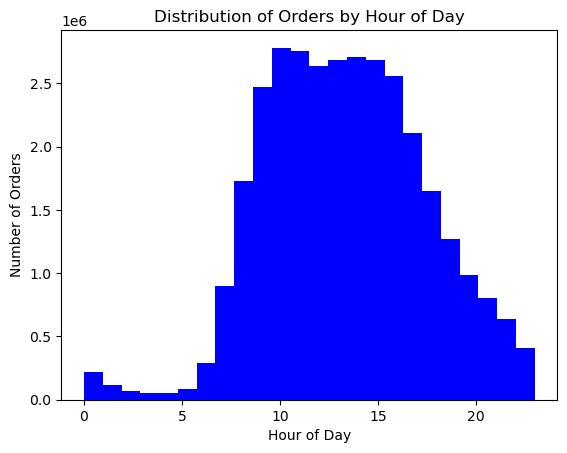

In [9]:
# Histogram for order_hour_of_day

hist = merged_df['order_hour_of_day'].plot.hist(bins=24, color='blue')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

# Description of what the histogram demonstrates

In [10]:
# Markdown Explanation:

# The histogram shows the distribution of orders placed at different hours of the day. 

# Most orders are placed in the late morning to late afternoon, with a peak around 10 AM to 3 PM.

#  Suggesting that most customers prefer to shop during their time at work (breakfast to lunch hours).

# With few exceptions making orders after work.

# Task 4: Create a bar chart from the “loyalty_flag” column

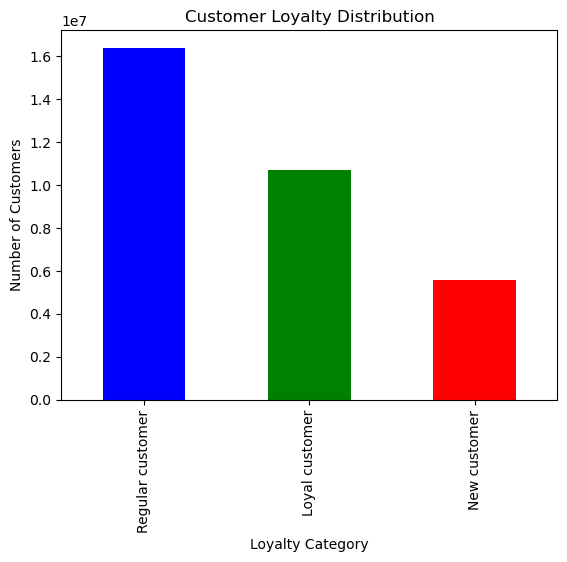

In [11]:
bar_loyalty = merged_df['loyalty_flag'].value_counts().plot.bar(color=['blue', 'green', 'red'])
plt.title('Customer Loyalty Distribution')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Customers')
plt.show()

# Task 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [12]:
# Create a random sample by generating a seed

np.random.seed(4)

In [13]:
# Create a dev list based on the data split desired (of interest) (70/30)

dev = np.random.rand(len(merged_df)) <= 0.7

In [14]:
# Split the dataframe into two samples

big = merged_df[dev]
small = merged_df[~dev]

In [15]:
# Compare the dataframe length to the sum of the big and small samples

len(merged_df)

32641268

In [16]:
len(big) + len(small)

32641268

In [17]:
# Reduce the samples to only the desired columns

merged_df_2 = small [['order_hour_of_day','prices']]

In [18]:
# Checking if the subset of the sample was successfully created 

merged_df_2.head()

,order_hour_of_day,prices
0,9,11.3
2,9,3.6
3,9,8.4
6,9,11.5
10,17,5.3


D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


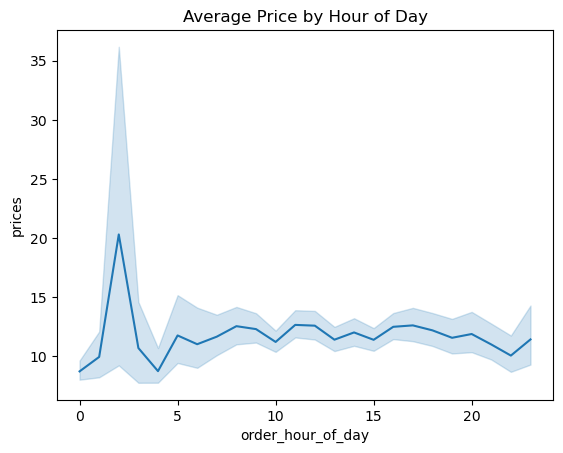

In [19]:
# Create a line chart

line = sns.lineplot(data = merged_df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Average Price by Hour of Day')
plt.show()

# Task 6: Create a line chart exploring the connections between age and number of dependents

In [20]:
# Reduce the previously created sample to only the desired columns of interest 

merged_df_3 = small [['age','num_dependents']]

In [21]:
# Check if the subset of the sample was successfully created 

merged_df_3.head()

,age,num_dependents
0,57,3
2,57,3
3,57,3
6,57,3
10,43,2


D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


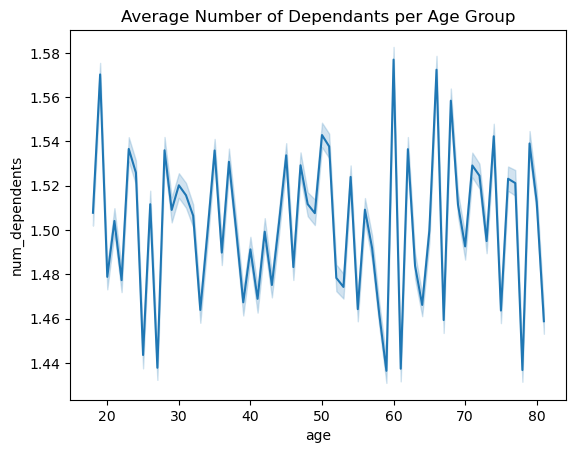

In [22]:
# Create a line chart of average number of dependants per age group

line_2 = sns.lineplot(data = merged_df_3, x = 'age',y = 'num_dependents')
plt.title('Average Number of Dependants per Age Group')
plt.show()

In [23]:
# Markdown Explanation:

# The line chart shows the average number of dependents per age group. 

# The visual indicated that the older-aged group customers have more dependants. 

# Compared to the younger and middle-aged customers with far less dependants.

# Task 7: Create a scatterplot to explore whether there's a connection between age and spending power (income)

In [26]:
# Reduce previously created sample to only the desired columns 

merged_df_4 = small [['age','income']]

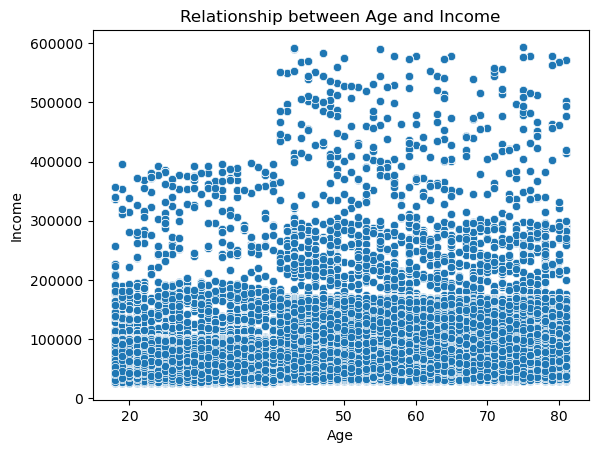

In [27]:
# Create a Scatterplot for age vs. income

scatter_age_income = sns.scatterplot(x='age', y='income', data = merged_df_4)
plt.title('Relationship between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [25]:
# Markdown Explanation:

# The scatterplot displays the relationship between age and income. 

# Dense Linear Pattern (Income: 0 - 200,000, Age: 0 - 80)

    # The majority of the data points are concentrated within this range.
    # A thick, linear pattern is observed, indicating a consistent distribution of income across various ages.
    # This suggests that most individuals fall within this income bracket regardless of their age, forming a dense cluster of points.

# Less Scattered Points (Income: 200,000 - 400,000, Age: 0 - 40)
    
    # In this range, there are fewer data points, and they do not form any clear pattern.
    # This indicates that fewer individuals have an income between 200,000 and 400,000 within the younger age group (0 - 40).

# Densely Concentrated Points (Income: 200,000 - 400,000, Age: 40 - 80)
    
    # There is a noticeable concentration of points in this range, though it tends to diminish as income approaches 400,000.
    # This suggests that middle-aged to older individuals (40 - 80) are more likely to fall into this income bracket, but the concentration decreases with higher income levels within this range.

# No Points Observed (Income: 400,000 - 600,000, Age: 0 - 40) 
    # There are no data points found in this range, indicating that individuals aged 0 - 40 do not reach income levels between 400,000 and 600,000 in the dataset.

# Scattered Points (Income: 400,000 - 600,000, Age: 40 - 80)
   
    # Several points are observed, but they are scattered and not densely packed.
    # This suggests that while some older individuals (40 - 80) do achieve higher incomes in this range, these cases are relatively rare and do not form a compact pattern.


# Task 8: Exporting the visualizations as “.png” files in the relevant project folders

In [33]:
hist.figure.savefig(os.path.join(visualizations_path, 'hist_order_hour_distribution.png'))

In [35]:
bar_loyalty.figure.savefig(os.path.join(visualizations_path, 'bar_loyalty_flag.png'))


In [36]:
line.figure.savefig(os.path.join(visualizations_path, 'line_prices_by_hour_distribution.png'))


In [37]:
line_2.figure.savefig(os.path.join(visualizations_path, 'line_number_of_dependants_per_age_group.png'))


In [38]:
scatter_age_income.figure.savefig(os.path.join(visualizations_path, 'scatter_age_and_income_relationship.png'))